### Distribuciones de probabilidad: revisión de conceptos

Las distribuciones de probabilidad son herramientas fundamentales para el análisis de datos. Nos permiten comprender la probabilidad de que ocurran diferentes eventos, así como la variabilidad de los datos.

**Razones para estudiarlas en ciencia de datos:**

**1. Comprender la incertidumbre:** El mundo real está lleno de incertidumbre. Las distribuciones de probabilidad nos ayudan a cuantificar esta incertidumbre y a hacer predicciones sobre eventos futuros.

**2. Modelar datos:** Las distribuciones de probabilidad nos permiten modelar la distribución de los datos. Esto nos ayuda a comprender mejor los datos y a realizar análisis estadísticos.

**3. Inferencia estadística:** Las distribuciones de probabilidad son la base de la inferencia estadística, que nos permite realizar inferencias sobre una población a partir de una muestra.

**4. Aprendizaje automático:** Las distribuciones de probabilidad se utilizan en muchos algoritmos de aprendizaje automático para modelar la probabilidad de que una instancia pertenezca a una clase determinada.

**5. Toma de decisiones:** Las distribuciones de probabilidad nos ayudan a tomar mejores decisiones al proporcionarnos información sobre la probabilidad de diferentes resultados.

**6. Visualización de datos:** Las distribuciones de probabilidad se pueden utilizar para visualizar datos de manera que se resalte la incertidumbre y la variabilidad.

**Beneficios de estudiarlas:**

* Desarrollar habilidades de pensamiento crítico y analítico.
* Mejorar la capacidad para resolver problemas.
* Tomar decisiones más informadas.
* Comunicar ideas de manera más efectiva.
* Desarrollar habilidades para el análisis de datos en ciencia de datos.

### Distribuciones de probabilidad

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/big_picture_probability_r.png)

Una distribución de probabilidad nos ayuda a resumir una población (o un conjuto de datos observados) a través de una función y un conjunto de parámetros.

**Probability Density Function (PDF)**

$$X\sim f(x; \theta),\ x \in \mathbb{R}$$

La función $f(x; \theta)$, conocida como PDF (probability density function) describe completamente nuestros datos.

**Cumulative Distribution Function (CDF)**

$$X\sim f(x; \theta),\ x \in \mathbb{R}$$

La expresión matemática de la CDF $F(x)$ para una variable aleatoria continua $X$ es la siguiente:

$$ F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) \, dt $$

Donde:
- $F(x)$ es la CDF de $X$,
- $f(t)$ es la función de densidad de probabilidad (PDF) de $X$,
- $P(X \leq x)$ es la probabilidad acumulada de que $X$ sea menor o igual a $x$,
- La integral representa la acumulación de probabilidades desde $-\infty$ hasta $x$.

La CDF tiene varias propiedades importantes, como que siempre está entre 0 y 1, es no decreciente (o monótona no decreciente), y tiende a 0 a medida que $x$ tiende a $-\infty$ y tiende a 1 a medida que $x$ tiende a $\infty$. La CDF es una herramienta fundamental en estadística y probabilidad para entender y caracterizar el comportamiento de las variables aleatorias.

Por ejemplo, valores que usamos para resumir un conjunto de valores observados de una variable aleatoria pueden ser calculados a partir de la PDF:

1. **Valor esperado, Media (o promedio):** Para encontrar la media en una distribución continua, necesitarás calcular la integral de $x$ multiplicado por la función de densidad de probabilidad ($f(x)$) sobre todo el rango de la variable. La fórmula matemática para la media ($\mu$) en una distribución continua es:

   $$ \mu = \int_{-\infty}^{\infty} x \cdot f(x) \,dx $$

2. **Mediana:** La mediana es el valor que divide la distribución en dos partes iguales. Para encontrar la mediana en una distribución continua, debes resolver la ecuación de la función de densidad de probabilidad acumulativa (CDF) para $x$ cuando $F(x) = 0.5$. Matemáticamente, esto se expresa como:

   $$ F(m) = \int_{-\infty}^{m} f(x) \,dx = 0.5 $$

   Donde $m$ es la mediana.

3. **Moda:** La moda en una distribución continua se encuentra buscando los máximos locales en la función de densidad de probabilidad. Es el valor de $x$ para el cual la función de densidad de probabilidad alcanza su punto máximo.

En la práctica desconocemos la PDF de una población y queremos inferirla a partir de un conjunto de valores observados.

**Por ejemplo supongamos que nuestra población sigue una distribución normal:**

$$X \sim N(\mu, \sigma)$$

Decimos que $X$ tiene una distribución normal con parámetros $\mu$ y $\sigma$.

$$f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

La función $f(x; \mu, \sigma)$ describe completamente nuestros datos.


In [1]:
from scipy.stats import norm

# Vamos a generar un muestreo aleatorio (rvs) de una v.a. X
# 𝑋∼𝑁(𝜇=0,𝜎=1)
# Tamaño de muestra n=1000
n = 500
# loc=𝜇=0, scale=𝜎=1)
X = norm.rvs(loc=0, scale=1, size=n)  # muestreo

- La mejor manera de visualizar una serie de datos continuos es un histograma (`histplot`).
- Vamos a sobreponer un `kdeplot` por lo que el histograma debe estar normalizado por densidad
  - Este tipo de gráfico (`kdeplot`) se utiliza comúnmente en estadísticas y visualización de datos para estimar la distribución de probabilidad de una variable continua.
- Usaremos un `rugplot` para visualizar nuestra muestra.
  - Un `rugplot` visualiza la ubicación de los puntos de datos a lo largo de una línea. Cada punto de datos se representa mediante una pequeña línea vertical (o "pelusa") que se coloca en el eje correspondiente (en este caso $x$).

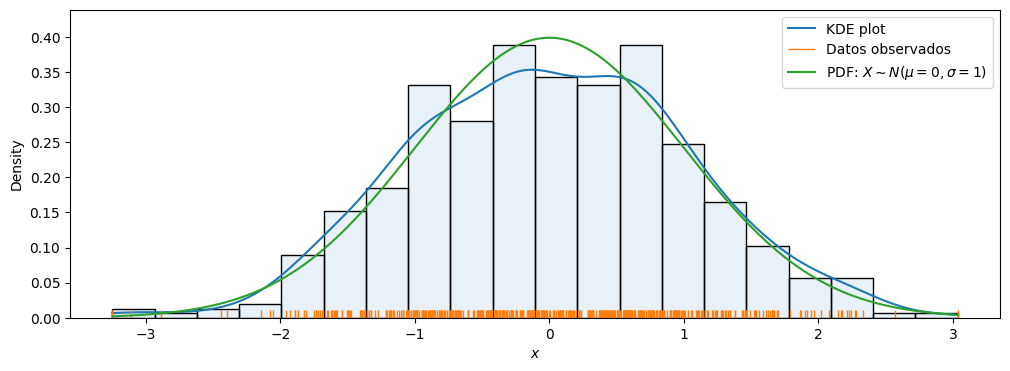

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# stat=density, area del histograma es 1
# esto es útil para superponer un gráfico de densidad (kdeplot)

plt.figure(figsize=(12,4))
sns.histplot(data=X, bins=20, alpha=0.1, stat="density")
sns.kdeplot(X, cut=0)  # cut=0, corta el kdeplot en min y max observados
sns.rugplot(X)

# Vamos a sobreponer la PDF de la distribución poblacional 𝑋∼𝑁(𝜇=0,𝜎=1)
x = np.linspace(X.min(), X.max(), 200)
fx = norm.pdf(x, loc=0, scale=1)
sns.lineplot(x=x, y=fx)
plt.xlabel(r"$x$")
plt.legend(["KDE plot", "Datos observados", "PDF: "+r"$X\sim N(\mu=0, \sigma=1)$"])

### Caso discreto

La PMF (Probability Mass Function o Función de Masa de Probabilidad) es una función que asigna probabilidades a eventos específicos en el contexto de variables aleatorias discretas. La PMF proporciona la probabilidad de que la variable aleatoria tome un valor particular. En otras palabras, especifica cómo se distribuye la probabilidad entre los diferentes valores que puede tomar la variable discreta.

La PMF se denota generalmente por $P(X = x)$, donde $X$ es la variable aleatoria y $x$ es un valor particular que puede tomar.

Las propiedades generales de una PMF son:

1. **No negatividad:** La PMF asigna probabilidades no negativas a cada valor posible de la variable aleatoria: $P(X = x) \geq 0$ para todo $x$.

2. **Suma de probabilidades igual a 1:** La suma de todas las probabilidades asociadas con los valores posibles de la variable aleatoria es igual a 1: $\sum P(X = x) = 1$.

Estas propiedades aseguran que la PMF sea coherente con las reglas fundamentales de la probabilidad. La PMF es esencial para describir completamente la distribución de probabilidad de una variable aleatoria discreta. La forma específica de la PMF dependerá del tipo de variable aleatoria y del contexto del problema. Ejemplos comunes de distribuciones discretas incluyen la distribución de Bernoulli, la distribución binomial, la distribución de Poisson, entre otras.

Para generar un caso discreto basado en el resumen del caso continuo proporcionado, podríamos considerar una distribución discreta específica y ajustar la presentación del concepto. En este caso, utilizaremos una distribución discreta de probabilidad conocida como la distribución de Poisson.

En el caso discreto, la CDF (Cumulative Distribution Function o Función de Distribución Acumulativa) se define de manera similar a su contraparte continua. La CDF de una variable aleatoria discreta $X$ se denota por $F(x)$ y se define como la probabilidad acumulada de que $X$ sea menor o igual a un valor específico $x$.

Matemáticamente, la CDF se expresa como:

$$ F(x) = P(X \leq x) $$

Donde:
- $F(x)$ es la función de distribución acumulativa de $X$,
- $P(X \leq x)$ es la probabilidad acumulada de que $X$ sea menor o igual a $x$.

Para una variable aleatoria discreta, la CDF se puede calcular sumando las probabilidades de todos los valores posibles que son menores o iguales a $x$. La fórmula general es:

$$ F(x) = \sum_{t \leq x} P(X = t) $$

Donde:
- $P(X = t)$ es la probabilidad de que $X$ tome el valor $t$.

La CDF proporciona información sobre cómo se acumula la probabilidad a medida que avanzamos en los valores posibles de la variable aleatoria discreta.

**Valor esperado**

El valor esperado $E[X]$ de una variable aleatoria discreta $X$ se calcula como la suma ponderada de todos los posibles valores que puede tomar, cada uno multiplicado por su probabilidad respectiva. Matemáticamente:

$$ E[X] = \sum_{x} x \cdot P(X = x) $$

Donde:
- $x$ son los posibles valores que puede tomar la variable aleatoria,
- $P(X = x)$ es la probabilidad de que $X$ sea igual a $x$.

**Distribución de Poisson:**

La distribución de Poisson es una distribución discreta que modela el número de eventos que ocurren en un intervalo de tiempo o espacio fijo, dado que estos eventos ocurren con una tasa promedio constante y de manera independiente.

La función de probabilidad de masa (PMF) de la distribución de Poisson para un valor $x$ es dada por:

$$ P(X = x) = f(x; \lambda) = \frac{e^{-\lambda} \cdot \lambda^x}{x!} $$

Donde:
- $X$ es una variable aleatoria que representa el número de eventos,
- $\lambda$ es la tasa promedio de eventos por intervalo,
- $e$ es la base del logaritmo natural (número de Euler, aproximadamente 2.71828),
- $x$ es un valor entero no negativo,
- $x!$ es el factorial de $x$.

Supongamos que estamos modelando el número de eventos que ocurren en un período de tiempo determinado. La tasa promedio de eventos por unidad de tiempo ($\lambda$) podría representar la frecuencia promedio de ocurrencia de eventos en este contexto.

Ahora, podemos generar un caso discreto basado en la distribución de Poisson, y en lugar de hablar sobre la PDF, podríamos referirnos a la PMF para describir la probabilidad de ocurrencia de un número específico de eventos.

**Ejemplo:**

Supongamos que estamos estudiando la cantidad de llamadas que recibe un centro de atención al cliente en una hora, y hemos observado que la tasa promedio de llamadas es de 5 por hora ($\lambda = 5$). Podemos usar la distribución de Poisson para modelar esto y calcular la probabilidad de recibir un número específico de llamadas en una hora.

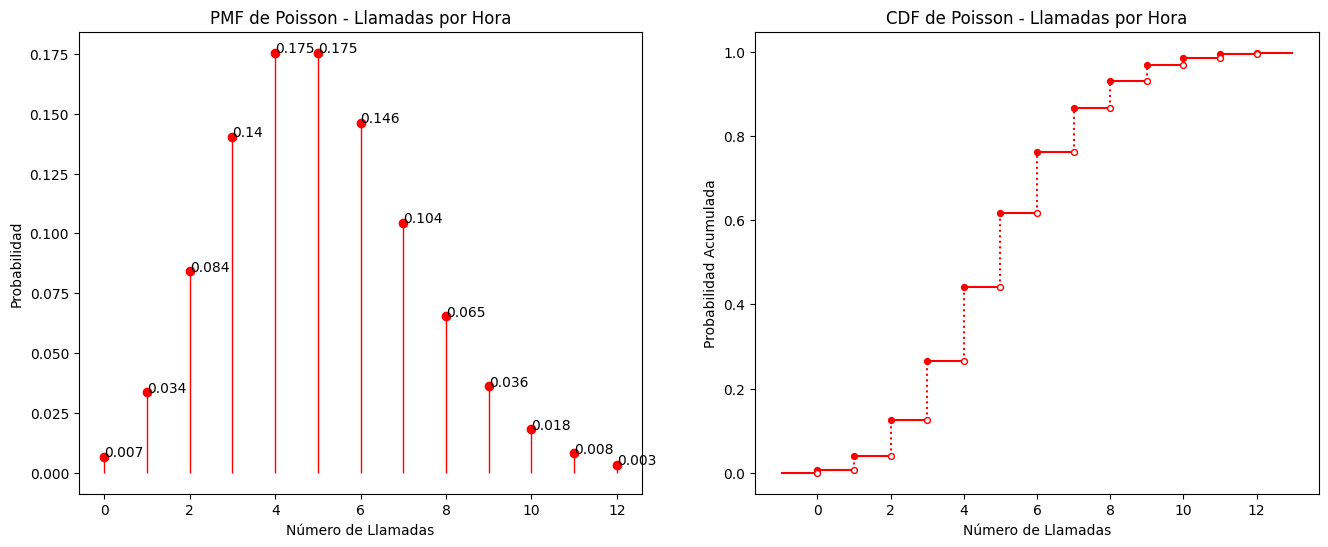

In [3]:
from scipy.stats import poisson

def plot_pmf(x, pmfx, ax=None):
    if ax is None: fig, ax = plt.subplots(1, 1)
    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
    ax.vlines(x, 0, pmfx, colors='r', linestyles='-', lw=1)  # líneas verticales
    ax.plot(x, pmfx, 'ro', label='Pmf')  # puntos sobre las lineas verticales
    for xi, fxi in zip(x, pmfx):
        ax.text(xi, fxi, str(np.round(fxi,3)))  # Imprimimos el valor de fx (PMF)


def plot_cdf(rvs_range, cdf_prob, ax=None):
    yn = np.insert(cdf_prob, 0, 0)

    if ax is None:
        fig, ax = plt.subplots()
        ax.set_facecolor('white')

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
    ax.hlines(y=yn, xmin=rvs_range[:-1], xmax=rvs_range[1:],
              color='red', zorder=1)

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
    ax.vlines(x=rvs_range[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
              linestyle='dotted', zorder=1)

    ax.scatter(rvs_range[1:-1], cdf_prob, color='red', s=18, zorder=2)
    ax.scatter(rvs_range[1:-1], yn[:-1], color='white', s=18, zorder=2,
               edgecolor='red')


fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Tasa promedio de llamadas por hora
lambda_value = 5

# Valores posibles de llamadas en una hora
x_values = np.arange(0, 13)

# Calcula la PMF para cada valor de llamadas
pmf_values = poisson.pmf(x_values, lambda_value)
cdf_values = poisson.cdf(x_values, lambda_value)

# Grafica la PMF
plot_pmf(x_values, pmf_values, ax[0])
ax[0].set_title('PMF de Poisson - Llamadas por Hora')
ax[0].set_xlabel('Número de Llamadas')
ax[0].set_ylabel('Probabilidad')

# Grafica la CDF
x_values = np.arange(x_values.min()-1, x_values.max()+2)  # Soporte, valores posibles de x +-1 para las colas de la distribución
plot_cdf(x_values, cdf_values, ax=ax[1])
ax[1].set_title('CDF de Poisson - Llamadas por Hora')
ax[1].set_xlabel('Número de Llamadas')
ax[1].set_ylabel('Probabilidad Acumulada')
plt.show()

### Calculamos probabilidades

- $P(X=4) = f(x=4; \lambda = 5) = 0.1755$

- $P(X \leq 4) = F(4) = \sum_{i=0}^4 f(x_i) = 0.01+0.03+0.08+0.14+0.18 = 0.4405$

- $P(2 \leq X \leq 4) = \sum_{i=2}^4 f(x_i) = 0.0842+0.1404+0.1755 = 0.4001$

- $P(2 \leq X \leq 4) = F(4) - F(1) = P(X\leq 4) - P(X \leq 2) = P(X\in \{0, 1, 2, 3, 4\}) - P(X\in \{0, 1\}) = P(X\in \{2, 3, 4\})$

In [4]:
print("𝑃(𝑋=4) =", poisson.pmf(4, lambda_value).round(4))  # Evaluate PDF
print("𝑃(𝑋≤4) =", poisson.cdf(4, lambda_value).round(4))  # Evaluate CDF
print("𝑃(2≤𝑋≤4) = ", poisson.pmf([2, 3, 4], lambda_value).sum().round(4))  # Evaluate PDF
print("𝑃(2≤𝑋≤4) = F(4) - F(1) = ",
      (poisson.cdf(4, lambda_value) - poisson.cdf(1, lambda_value)).round(4))  # Evaluate CDF

𝑃(𝑋=4) = 0.1755
𝑃(𝑋≤4) = 0.4405
𝑃(2≤𝑋≤4) =  0.4001
𝑃(2≤𝑋≤4) = F(4) - F(1) =  0.4001


### Ejemplo distribución normal

Una empresa de material eléctrico fabrica bombillas de luz cuya duración, antes de quemarse, se distribuye normalmente con una media igual a 800 horas y una desviación estándar de 40 horas. Queremos calcular la probabilidad de que una bombilla se queme entre 778 y 834 horas.

Dado que la duración de las bombillas sigue una distribución normal $X \sim N(\mu=800, \sigma=40)$, la pregunta es encontrar $P(778 < X < 834)$.

$$P(778 < X < 834) = F(834) - F(778) = 0.5112$$

- Vamos a calcular probabilidades usando la CDF:

In [5]:
# Parámetros de la distribución normal
mu = 800
sigma = 40

# Límites inferior y superior
lower_limit = 778
upper_limit = 834

# Calcular la probabilidad utilizando la CDF
probability = norm.cdf(upper_limit, mu, sigma) - norm.cdf(lower_limit, mu, sigma)

# Imprimir el resultado
print("Calculamos: F(834) - F(778) = ", norm.cdf(upper_limit, mu, sigma).round(4), '-',
      norm.cdf(lower_limit, mu, sigma).round(4),
      "=", (norm.cdf(upper_limit, mu, sigma) - norm.cdf(lower_limit, mu, sigma)).round(4)
     )

Calculamos: F(834) - F(778) =  0.8023 - 0.2912 = 0.5112


- Vamos a graficar la PDF, hacer simulaciones y responder de forma teórica como arriba y por simulación.

Area (prob): 0.5111777005485865
F(834) - F(778): 0.5111777700889613


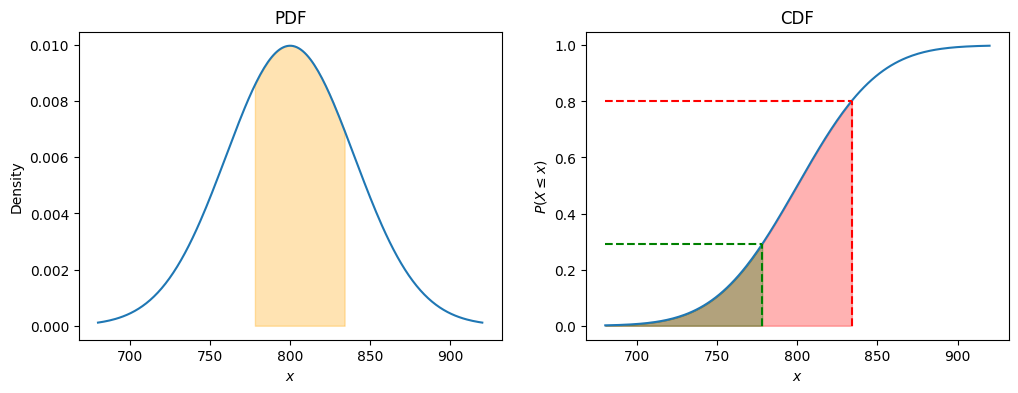

In [6]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
pdf_x = norm.pdf(x, mu, sigma)
cdf_x = norm.cdf(x, mu, sigma)

x_prob = np.linspace(778, 834, 1000)
pdf_prob = norm.pdf(x_prob, mu, sigma)

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.lineplot(x=x, y=pdf_x)
plt.fill_between(x_prob, pdf_prob, color="orange", alpha=0.3)
plt.xlabel(r'$x$')
plt.ylabel("Density")
plt.title("PDF")

plt.subplot(1, 2, 2)
sns.lineplot(x=x, y=cdf_x)
plt.hlines(norm.cdf(834, mu, sigma), x.min(), 834, linestyles="dashed", colors="red")  # líneas horizontales
plt.hlines(norm.cdf(778, mu, sigma), x.min(), 778, linestyles="dashed", colors="green")  # líneas horizontales
plt.vlines(778, 0, norm.cdf(778, mu, sigma), linestyles="dashed", colors="green")  # líneas horizontales
plt.vlines(834, 0, norm.cdf(834, mu, sigma), linestyles="dashed", colors="red")  # líneas horizontales
plt.fill_between(np.linspace(x.min(), 834),  norm.cdf(np.linspace(x.min(), 834), mu, sigma), color="red", alpha=0.3)
plt.fill_between(np.linspace(x.min(), 778),  norm.cdf(np.linspace(x.min(), 778), mu, sigma), color="green", alpha=0.3)
plt.xlabel(r'$x$')
plt.ylabel(r"$P(X\leq x)$")
plt.title("CDF")

print("Area (prob):", np.trapz(pdf_prob, x_prob))
print("F(834) - F(778):", norm.cdf(834, mu, sigma) - norm.cdf(778, mu, sigma))

- Discuta:
    - Estamos evaluando $F(p) = P(X\leq x)$, conocemos una probabilidad acumulada $p$ y queremos encontrar $x$.
    - Es decir $x=F^{-1}(p)$, evaluamos en la inversa de la acumulada un valor $p$ y obtenemos el valor $x$ correspondiente.
    - La función $F^{-1}(p)$ se conoce como función cuantil.

### Inferencia estadística

- **La inferencia estadística** es una disciplina que se ocupa de realizar deducciones y generalizaciones sobre una población a partir de una muestra de datos observados. Su objetivo principal es obtener conclusiones o estimaciones acerca de parámetros desconocidos de una población, basándose en la información contenida en la muestra. En otras palabras, la inferencia estadística permite tomar decisiones informadas sobre características poblacionales utilizando métodos probabilísticos y modelos estadísticos.

  - Esto se logra mediante la aplicación de técnicas como la **estimación de parámetros, pruebas de hipótesis y construcción de intervalos de confianza**, que permiten extender los resultados obtenidos de la muestra al conjunto más amplio de individuos o elementos representados por la población. La inferencia estadística es esencial en la toma de decisiones basada en datos y proporciona herramientas valiosas para entender y cuantificar la incertidumbre asociada a las conclusiones extraídas de un conjunto limitado de observaciones.

  - **El ajuste de distribuciones** consiste en identificar y aplicar una función de probabilidad que mejor describe un conjunto de datos observados. Este proceso implica comparar la distribución teórica con la distribución empírica de los datos mediante métodos estadísticos. El objetivo es encontrar los parámetros que optimizan el ajuste de la distribución teórica a los datos observados, permitiendo así modelar y entender la variabilidad de la población subyacente. Las técnicas de ajuste de distribuciones son fundamentales en estadísticas y análisis de datos, ya que facilitan la descripción y predicción de eventos futuros basándose en la distribución de probabilidad que mejor representa el comportamiento de los datos observados.

### Inferencia Estadística

- Vamos a presentar algunos conceptos que nos serán útiles para entender la inferencia estadística.

- Hemos presentado conceptos de distribución de una variable aleatoria (v.a.) tanto para el caso discreto como continuo.
  - En nuestros ejemplos siempre hemos conocido los parámetros poblacionales de nuestra distribución.

- Cuando observamos un sistema, tenemos acceso a una muestra finita (subconjunto), $x_1, x_2, \dots, x_n$ de la población, que sigue cierta distribución, ej. $X\sim N(\mu, \sigma)$.
  
  - En la mayoría de los casos, desconocemos la distribución de la población y desconocemos sus parámetros $\mu, \sigma$.

- **La estadística inferencial** se encarga de inferir información acerca de los parámetros poblacionales, ej. $\mu, \sigma$, a partir de la muestra observada.

- Por ejemplo la media muestral $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$ es un **estimador puntual** de la media poblacional $\mu$ y la varianza muestral $s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2$ es un estimador no sesgado de la varianza poblacional.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/sample.png" alt="" width="600" />

- Presentaremos conceptos como función generatriz de momentos, que nos serán útiles para demostrar el teorema del límite central.

- El teorema del límite central nos dice qué distribución tiene la v.a. $\bar{X}$.
  - Conocer la distribución de $\bar{X}$ nos ayudará a inferir información acerca del parámetro poblacional $\mu$.

- Algunos conceptos que debemos tener en cuenta para esta sección:
  - **Población:** es el conjunto de elementos que son objeto de estudio estadístico.
  - **Individuo:** cada uno de los elementos de la población.
    - El número total de individuos de la población se suele denotar como $N$.
  - **Muestra:** es una parte (subconjunto) de la población con la que realmente se realiza el estudio.
  - **Tamaño de muestra:** es el número de elementos del que se compone la muestra y se suele denotar como **n**.
  - **Estadístico:** cualquier función de la muestra. Por ejemplo, la media o la varianza muestrales son estadísticos.
  - **Estimadores:** son estadísticos independientes de los parámetros de la población, y que se utilizan para aproximarlos.
  
- Si conocemos la distribución de probabilidad de nuestros estimadores, conocemos todas sus propiedades y seremos capaces de construir intervalos de confianza y pruebas de hipótesis.

Sabemos por el Teorema del Límite Central que, $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i \sim N(\mu, \sigma^2 / n)$ donde $\mu$ y $\sigma$ corresponden a la media y desviación estándar de la distribución de origen a partir de la cual ocurre el muestreo, y $n$ el tamaño de muestra.

El Teorema del Límite Central es un principio fundamental en estadísticas que establece que, bajo ciertas condiciones, la suma o media de un gran número de variables aleatorias independientes e idénticamente distribuidas converge a una distribución normal, independientemente de la forma original de la distribución. Este teorema es esencial en inferencia estadística, ya que proporciona una base teórica para la aplicación de métodos estadísticos en muestras grandes, permitiendo realizar inferencias sobre la media poblacional incluso cuando la distribución original de los datos puede ser desconocida o no seguir una distribución normal.

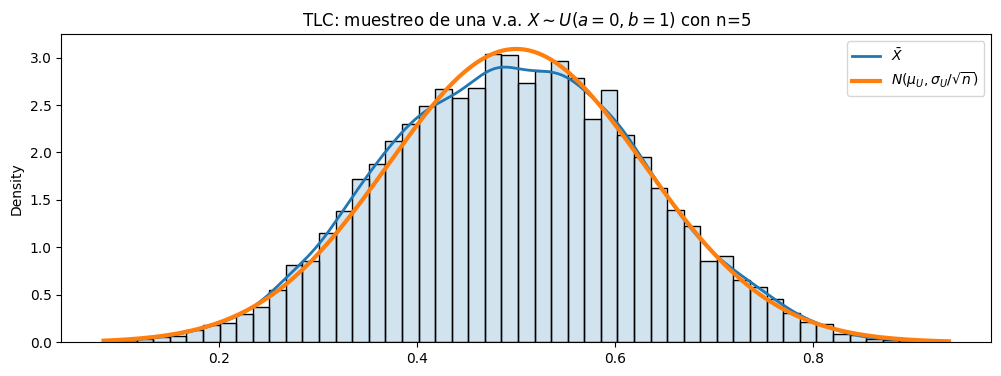

In [44]:
# TLC: Teorema del Límite Central
from scipy.stats import uniform

n = 5  # tamaño de muestra
repetitions = 10000  # número de simulaciones

# Realizamos un muestreo a partir de una dist. uniforme
a, b = 0, 1  # Parámetros dist. uniforme
# Ver: https://en.wikipedia.org/wiki/Continuous_uniform_distribution
X_bar = uniform.rvs(a, b, size=(n, repetitions)).mean(axis=0)  # X_bar sigue una dist. normal

# mu y sigma de la distribución uniforme con, a=0, b=1.
# Ver: https://en.wikipedia.org/wiki/Continuous_uniform_distribution
mu = 1/2*(a+b)  # media de la dist. uniforme
variance = 1/12*(b-a)**2  # varianza de la dist. uniforme
sigma = np.sqrt(variance / n)  # sobre n de acuerdo al TLC

x = np.linspace(X_bar.min(), X_bar.max(), 200)
normal_pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12,4))
sns.histplot(x=X_bar, stat="density", alpha=0.2)
sns.kdeplot(x=X_bar, cut=0, linewidth=2)
sns.lineplot(x=x, y=normal_pdf, linewidth=3)
plt.legend([r"$\bar{X}$", r"$N(\mu_U, \sigma_{U}/\sqrt{n})$"])
plt.title(r"TLC: muestreo de una v.a. $X\sim U(a=0, b=1)$ con n="+str(n))
plt.show()

IC(68.0%): (84.40722822386996, 110.92610510946338)
IC(90.0%): (75.73528497398037, 119.59804835935297)
IC(95.0%): (71.53381353946595, 123.79951979386739)


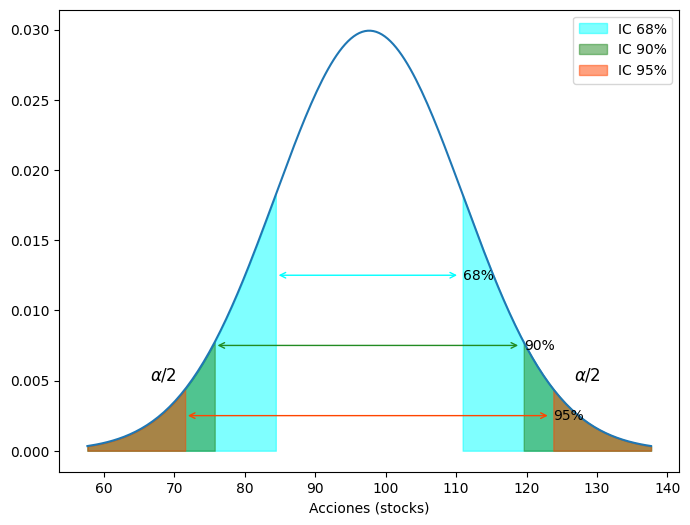

In [7]:
media_muestral = muestra.mean()  # X barra
sigma2 = 400  # varianza conocida
ssigma = np.sqrt(sigma2)  # desviación estándar
n = 9  # tamaño de la muestra
se = sigma / np.sqrt(n)  # estándar error

# PDF
plt.figure(figsize=(8,6))
x = np.linspace(media_muestral-3*se, media_muestral+3*se, 200)
plt.plot(x, norm.pdf(x, media_muestral, se))

alpha = 0.32  # IC 68%

# Python implementa el cálculo del intervalo de confianza
# loc: media muestral
# scale: error estándar s/sqrt(n)

# IC 68%
IC68 = norm.interval(1-alpha, loc=muestra.mean(), scale=se)  # intervalo IC68
print(r"IC("+str((1-alpha)*100)+"%):", IC68)

# sombreamos cola izquierda para IC68
x_left = np.linspace(media_muestral-3*se, IC68[0])
plt.fill_between(x_left, norm.pdf(x_left, media_muestral, se), color='cyan', alpha=0.5)
# sombreamos cola derecha para IC68
x_right = np.linspace(IC68[1], media_muestral+3*se)
plt.fill_between(x_right, norm.pdf(x_right, media_muestral, se),
                 color='cyan', alpha=0.5, label="IC 68%")
plt.annotate("68%", xy=(IC68[0], 0.0125), xytext=(IC68[1], 0.0125),
             va="center", # alineado vertical
             arrowprops=dict(arrowstyle="<->", color="cyan"))

# IC 90%
alpha = 0.1  # IC 90%
IC90 = norm.interval(1-alpha, loc=muestra.mean(), scale=se)  # intervalo IC90
print(r"IC("+str((1-alpha)*100)+"%):", IC90)

# sombreamos cola izquierda para IC90
x_left = np.linspace(media_muestral-3*se, IC90[0])
plt.fill_between(x_left, norm.pdf(x_left, media_muestral, se), color='forestgreen', alpha=0.5)
# sombreamos cola derecha para IC90
x_right = np.linspace(IC90[1], media_muestral+3*se)
plt.fill_between(x_right, norm.pdf(x_right, media_muestral, se),
                 color='forestgreen', alpha=0.5, label="IC 90%")
plt.annotate("90%", xy=(IC90[0], 0.0075), xytext=(IC90[1], 0.0075),
             va="center", # alineado vertical
             arrowprops=dict(arrowstyle="<->", color="forestgreen"))

# IC 95%
alpha = 0.05  # # IC 95%
IC95 = norm.interval(1-alpha, loc=muestra.mean(), scale=se)  # intervalo IC95
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

# sombreamos cola izquierda para IC95
x_left = np.linspace(media_muestral-3*se, IC95[0])
plt.fill_between(x_left, norm.pdf(x_left, media_muestral, se), color='orangered', alpha=0.5)
# sombreamos cola derecha para IC95
x_right = np.linspace(IC95[1], media_muestral+3*se)
plt.fill_between(x_right, norm.pdf(x_right, media_muestral, se),
                 color='orangered', alpha=0.5, label="IC 95%")
plt.annotate("95%", xy=(IC95[0], 0.0025), xytext=(IC95[1], 0.0025),
             va="center", # alineado vertical
             arrowprops=dict(arrowstyle="<->", color ='orangered'))
plt.text(IC95[0]-5, 0.005, r"$\alpha/2$", fontsize=12)
plt.text(IC95[1]+3, 0.005, r"$\alpha/2$", fontsize=12)
plt.xlabel("Acciones (stocks)")
legend=plt.legend()

### Intervalo t de confianza para la media

- Vamos a realizar un muestreo de una distribución normal estándar
$X\sim N(0,1)$.

- Construiremos un intervalo t para la media.
Vea como cambia el ancho del intervalo de acuerdo al nivel de confianza y al tamaño de muestra.

interactive(children=(Dropdown(description='Nivel_Confianza', options=(0.68, 0.9, 0.95, 0.99), value=0.68), Dr…

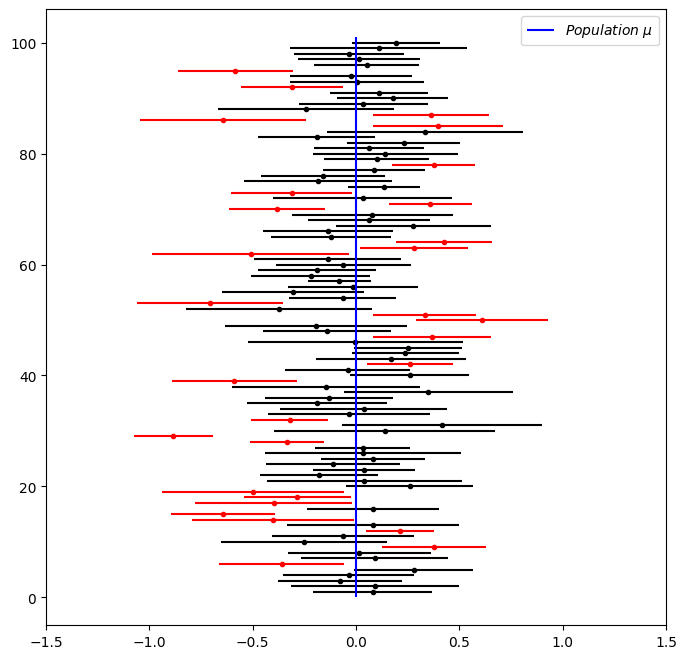

In [9]:
import ipywidgets as widgets
import ipywidgets

from scipy.stats import t

def interval(nc, n, repetitions=100):
    alpha = 1 - nc
    df = n - 1  # grados de libertad para t

    # Estamos muestreando la distribución uniforme estándar
    mu = 0  # mu: media poblacional

    U = norm.rvs(size=(repetitions,n))  # normal rvs
    Um = np.mean(U, axis=1)  # media muestral
    Us = np.std(U, ddof=1, axis=1)  # varianza muestral
    se = Us / np.sqrt(n)  # error estándar

    ICL, ICU = t.interval(1-alpha, df, loc=Um, scale=se)  # Intervalo de confianza

    CI = np.vstack([ICL, ICU]).transpose()  # unimos ICL, ICU en 2 columnas
    # comprobamos que mu está en el intervalo
    # para esto debe cumplirse que limite inferior < mu y límite superior mayor que mu
    # np.logical_and(CI[:,0] < mu, CI[:,1] > mu)
    # ubicamos los índices donde se cumple la condición anterior
    # np.where(condicion)[]
    cont = np.where(np.logical_and(CI[:,0] < mu, CI[:,1] > mu))[0]

    plt.figure(figsize=(8,8))

    # Graficamos cada intervalo como una línea horizontal
    # Si el intervalo contiene la media poblacinal mu es negro
    # rojo en caso contrario
    for pos, limits in enumerate(CI):
        if pos in cont:  # está dentro del intervalo
            col = 'k'  # color negro
        else:  # está fuera del intervalo
            col = 'r'  # color rojo
        plt.hlines(pos+1, limits[0], limits[1], colors=col)  # línea horizontal
        plt.plot(Um[pos], pos+1, '.', c=col)

    plt.vlines(mu, 0, repetitions+1, colors='b', label=r"$Population\ \mu$")
    plt.legend()
    plt.xlim(-1.5, 1.5)

    # Contemos cuantas veces el intervalo contiene la media poblacional
    # Si el intervalo (lineal horizontal) contiene la media, este se intersecta con la línea vertical azul
    print("La media poblacional está en el intervalo "+str(np.shape(cont)[0]/repetitions*100)+"% de las veces.")


@ipywidgets.interact
def simulate_intervals(Nivel_Confianza=[0.68, 0.9, 0.95, 0.99],
                       Muestra=[10, 30, 100, 500, 1000]
                      ):
    interval(Nivel_Confianza, Muestra, repetitions=100)

### Pruebas de hipótesis

- Revisemos: https://nbviewer.org/github/marsgr6/EN-online/blob/main/statistical_tests.ipynb

## Anexo: Revise

### ANOVA

- Investigue el análisis de varianza (ANOVA) de un factor. Este es un método estadístico para examinar las diferencias para las medias entre grupos.
  - Sources:
    - https://online.stat.psu.edu/stat415/lesson/13
    - https://www.reneshbedre.com/blog/anova.html

### Estimación de máxima verosimilitud

- Con anterioridad hemos hecho referencia a estimación de máxima verosimilitud, investigue acerca de estimación de máxima verosimilitud.
  - Sources:
    - https://newonlinecourses.science.psu.edu/stat414/node/289/
    - https://newonlinecourses.science.psu.edu/stat414/node/290/
    
    
### Distribution fitting
- [En Python](https://anaconda.org/marsgr6/distribution_fitting_python/notebook)
- [En R](https://anaconda.org/marsgr6/distribution_fitting_r/notebook)

In [10]:
# Subir archivo viz.py
!wget https://raw.githubusercontent.com/marsgr6/EN-online/main/viz.py

from viz import *

all_data = {"Attrition": pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv"),
            "Usability": pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/UX_data.csv"),
            "Tips": sns.load_dataset("tips"),
            "Diamonds": sns.load_dataset("diamonds"),
            "MPG": sns.load_dataset("mpg"),
            "Iris": sns.load_dataset("iris"),
            "Geyser": sns.load_dataset("geyser"),
            "Penguins": sns.load_dataset("penguins"),
            "Titanic": sns.load_dataset("titanic")
           }

# Add additional dataframe to data dictionary
all_data["NY_collision"] = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

plot_data(all_data)

--2024-01-29 18:32:10--  https://raw.githubusercontent.com/marsgr6/EN-online/main/viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25600 (25K) [text/plain]
Saving to: ‘viz.py’

viz.py              100%[===================>]  25.00K  --.-KB/s    in 0s      

2024-01-29 18:32:10 (112 MB/s) - ‘viz.py’ saved [25600/25600]



interactive(children=(Dropdown(description='ds', options=('Attrition', 'Usability', 'Tips', 'Diamonds', 'MPG',…